<a href="https://colab.research.google.com/github/VoXuanLanh/BT_fuzzy_Logic/blob/main/2_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

traffic= ctrl.Antecedent(np.arange(0,11,0.1),'traffic')
distance= ctrl.Antecedent(np.arange(0,10,0.1),'distance')
weather= ctrl.Antecedent(np.arange(0,4,0.1),'weather')
preparation_time= ctrl.Antecedent(np.arange(0,20,1),'preparation_time')
fatigue= ctrl.Antecedent(np.arange(0,11,0.1),'fatigue')
delivery_time= ctrl.Consequent(np.arange(0,31,1),'delivery_time')
incentive_bonus= ctrl.Consequent(np.arange(0,100,0.1),'incentive_bonus')
rating= ctrl.Consequent(np.arange(1,6,1),'rating')

traffic['low']=fuzz.trimf(traffic.universe,[0,0,3.5])
traffic['medium']=fuzz.trimf(traffic.universe,[3,5,7.5])
traffic['high']=fuzz.trimf(traffic.universe,[7,9,10])

distance['short']=fuzz.trimf(distance.universe,[0,0,3.1])
distance['medium']=fuzz.trimf(distance.universe,[3,5,8.1])
distance['long']=fuzz.trimf(distance.universe,[8,10,10])

weather['clear']=fuzz.trimf(weather.universe,[0,0,1.1])
weather['rainy']=fuzz.trimf(weather.universe,[1,1.5,2.1])
weather['storm']=fuzz.trimf(weather.universe,[2,2.5,3.1])

preparation_time['fast']=fuzz.trimf(preparation_time.universe,[0,0,5])
preparation_time['medium']=fuzz.trimf(preparation_time.universe,[4,10,16])
preparation_time['slow']=fuzz.trimf(preparation_time.universe,[15,20,20])

fatigue['low']=fuzz.trimf(fatigue.universe,[0,0,4.1])
fatigue['medium']=fuzz.trimf(fatigue.universe,[4,6,7.5])
fatigue['high']=fuzz.trimf(fatigue.universe,[7,10,10])

delivery_time['S']=fuzz.trimf(delivery_time.universe,[0,0,11])
delivery_time['M']=fuzz.trimf(delivery_time.universe,[9,17.5,26])
delivery_time['L']=fuzz.trimf(delivery_time.universe,[25,30,30])

incentive_bonus['L']=fuzz.trimf(incentive_bonus.universe,[0,0,10])
incentive_bonus['M']=fuzz.trimf(incentive_bonus.universe,[9,20,30])
incentive_bonus['H']=fuzz.trimf(incentive_bonus.universe,[29,100,100])

rating['P']=fuzz.trimf(rating.universe,[1,1,2.5])
rating['A']=fuzz.trimf(rating.universe,[2,3,4])
rating['B']=fuzz.trimf(rating.universe,[3.5,4.5,6])

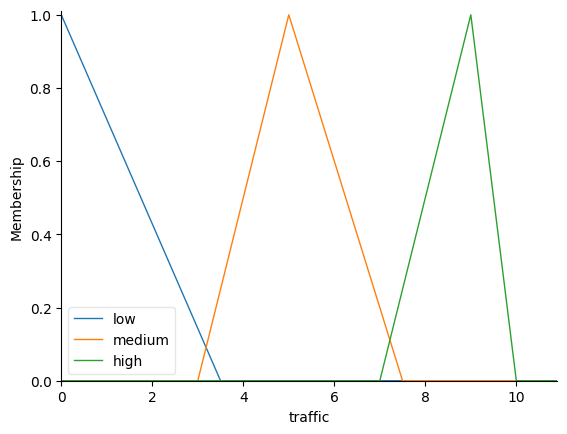

In [ ]:
traffic.view()

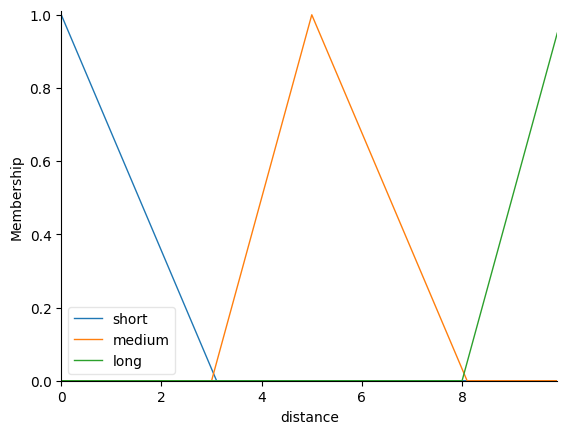

In [ ]:
distance.view()

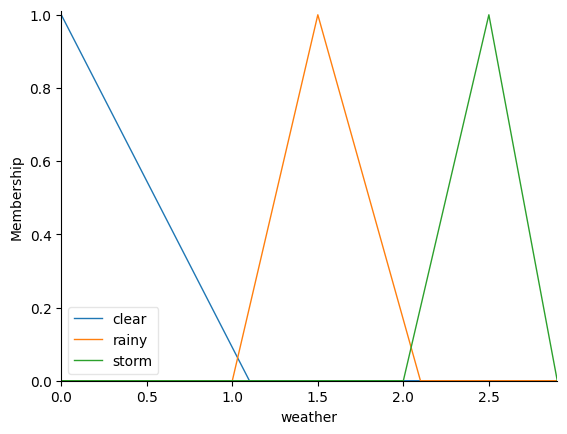

In [ ]:
weather.view()

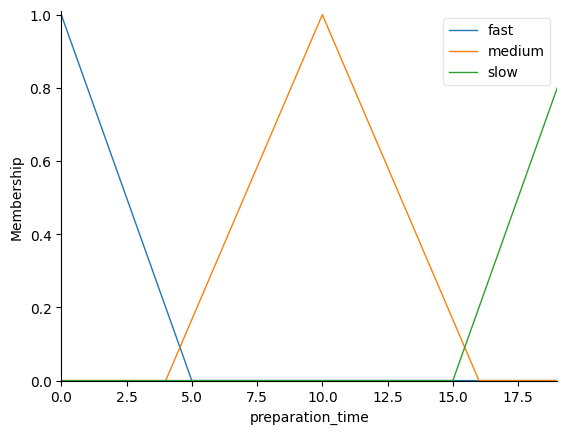

In [ ]:
preparation_time.view()

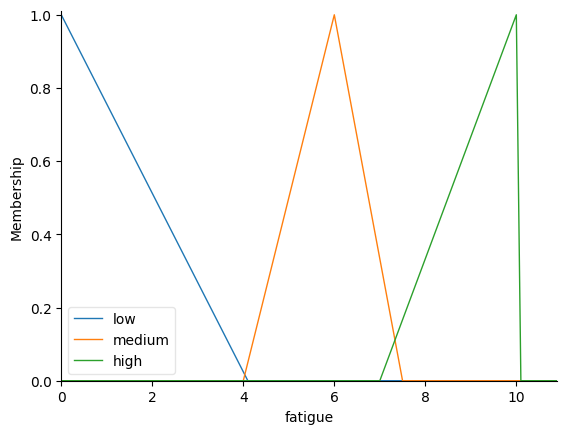

In [ ]:
fatigue.view()

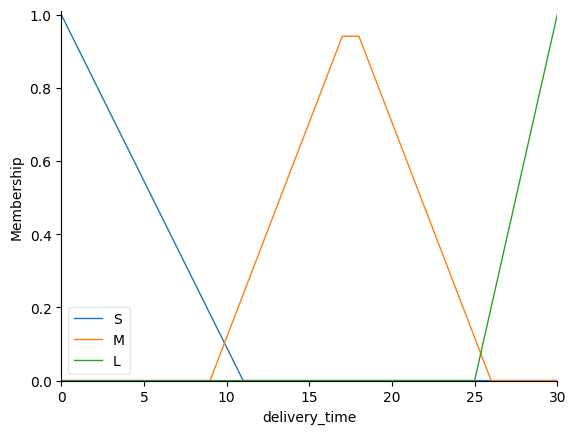

In [ ]:
delivery_time.view()

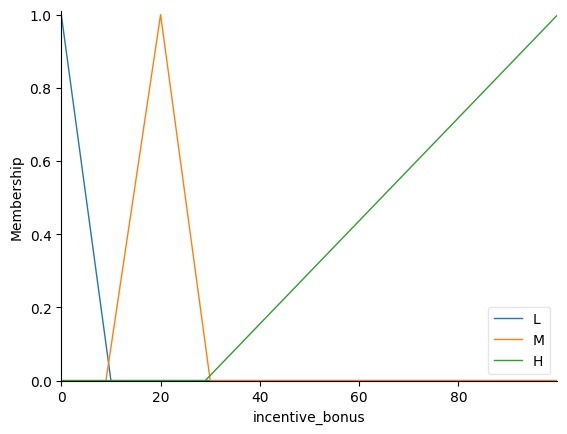

In [ ]:
incentive_bonus.view()

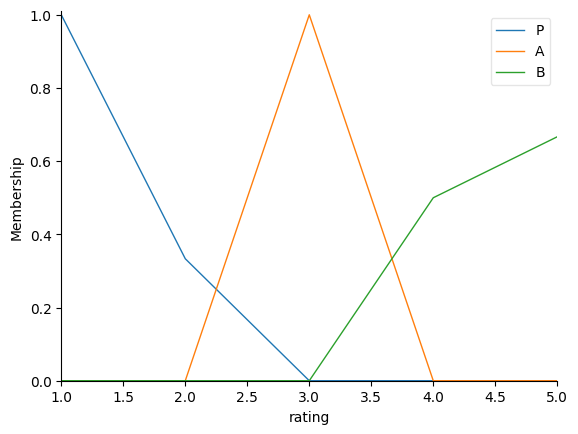

In [ ]:
rating.view()

In [ ]:
rule1=ctrl.Rule(traffic['low']&distance['short'],delivery_time['S'])
rule2=ctrl.Rule(traffic['medium']&distance['short'],delivery_time['M'])
rule3=ctrl.Rule(traffic['high']&distance['short'],delivery_time['L'])

rule4=ctrl.Rule(weather['clear'],incentive_bonus['L'])
rule5=ctrl.Rule(weather['rainy'],incentive_bonus['M'])
rule6=ctrl.Rule(weather['storm'],incentive_bonus['H'])

rule7=ctrl.Rule(preparation_time['fast']&traffic['low'],delivery_time['S'])
rule8=ctrl.Rule(preparation_time['medium']&traffic['medium'],delivery_time['M'])
rule9=ctrl.Rule(preparation_time['slow']&traffic['high'],delivery_time['L'])

rule10=ctrl.Rule(fatigue['low'],rating['P'])
rule11=ctrl.Rule(fatigue['medium'],rating['A'])
rule12=ctrl.Rule(fatigue['high'],rating['B'])

rule13=ctrl.Rule(distance['long']&weather['storm']&traffic['high'],(delivery_time['L'],incentive_bonus['H']))
rule14=ctrl.Rule(distance['short']&weather['clear']&traffic['low'],(delivery_time['S'],incentive_bonus['L']))
rule15=ctrl.Rule(fatigue['high']&traffic['high'],(rating['P'],delivery_time['L']))

Thời gian dự kiến giao hàng: 28.277777777777775
Điểm thưởng: 67.31854891567659
Đánh giá: 3.0263157894736845


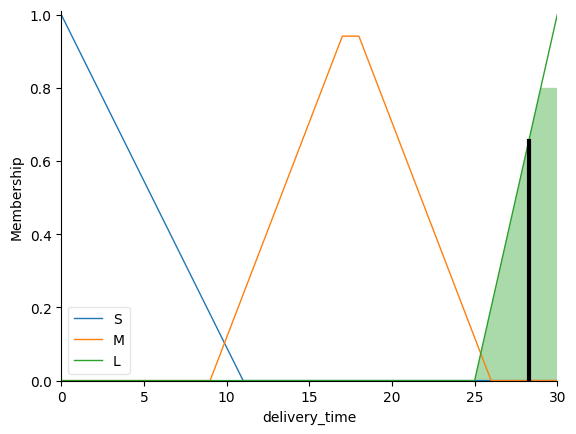

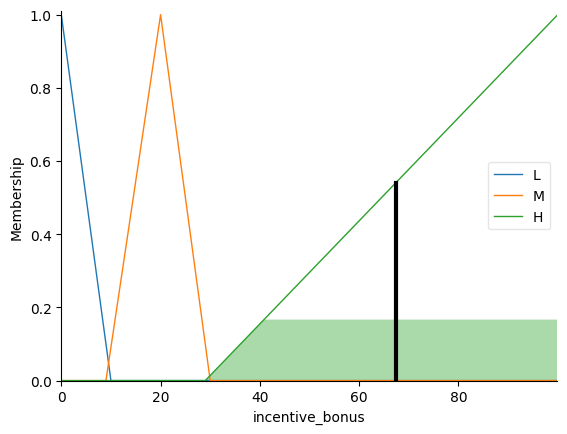

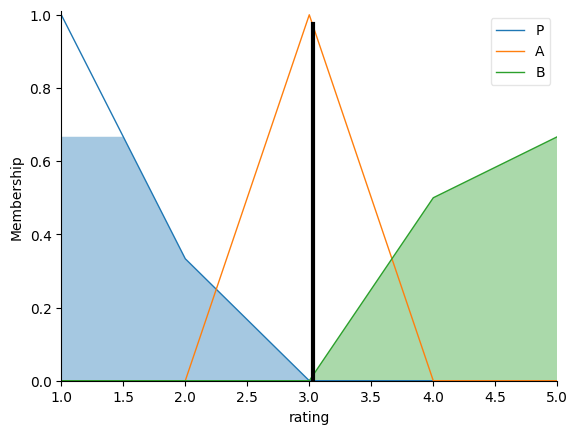

In [ ]:
fuzzy_system=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15])
grab_system=ctrl.ControlSystemSimulation(fuzzy_system)
grab_system.input['traffic']=9
grab_system.input['distance']=9
grab_system.input['weather']=3
grab_system.input['preparation_time']=19
grab_system.input['fatigue']=9
grab_system.compute()
print(f"Thời gian dự kiến giao hàng: {grab_system.output['delivery_time']}")
print(f"Điểm thưởng: {grab_system.output['incentive_bonus']}")
print(f"Đánh giá: {grab_system.output['rating']}")
delivery_time.view(sim=grab_system)
incentive_bonus.view(sim=grab_system)
rating.view(sim=grab_system)